In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/logistic-regression-heart-disease-prediction/framingham_heart_disease.csv


In [3]:
df=pd.read_csv("/kaggle/input/logistic-regression-heart-disease-prediction/framingham_heart_disease.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


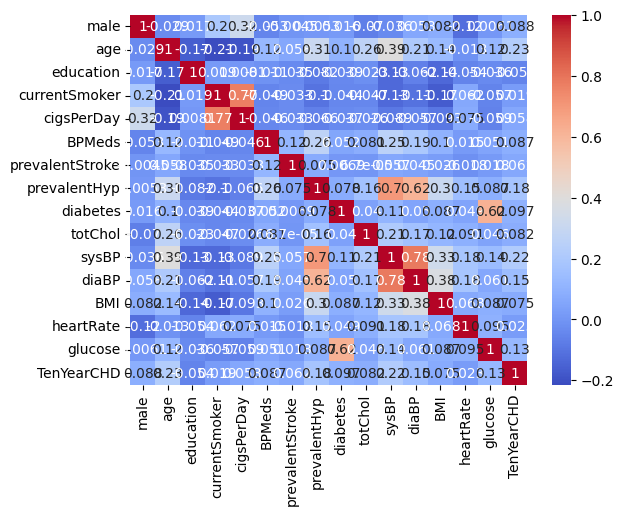

In [24]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [7]:
df.isnull().sum()


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
# education table  have most null values as well as it is least affecting feature so will drop it
data = df.drop(['education'], axis = 1)
data.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [18]:
# for other remaining colums where null value exist we can either remove the rows with null values or we can replace them with mean avg of that column
data["cigsPerDay"].fillna(round(data["cigsPerDay"].mean(),2),inplace = True)
data["BPMeds"].fillna(round(data["BPMeds"].mean(),2),inplace = True)
data["totChol"].fillna(round(data["totChol"].mean(),2),inplace = True)
data["BMI"].fillna(round(data["BMI"].mean(),2),inplace = True)
data["heartRate"].fillna(round(data["heartRate"].mean(),2),inplace = True)
data["glucose"].fillna(round(data["glucose"].mean(),2),inplace = True)

/tmp/ipykernel_36/3937707340.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["cigsPerDay"].fillna(round(data["cigsPerDay"].mean(),2),inplace = True)
/tmp/ipykernel_36/3937707340.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [19]:
data.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

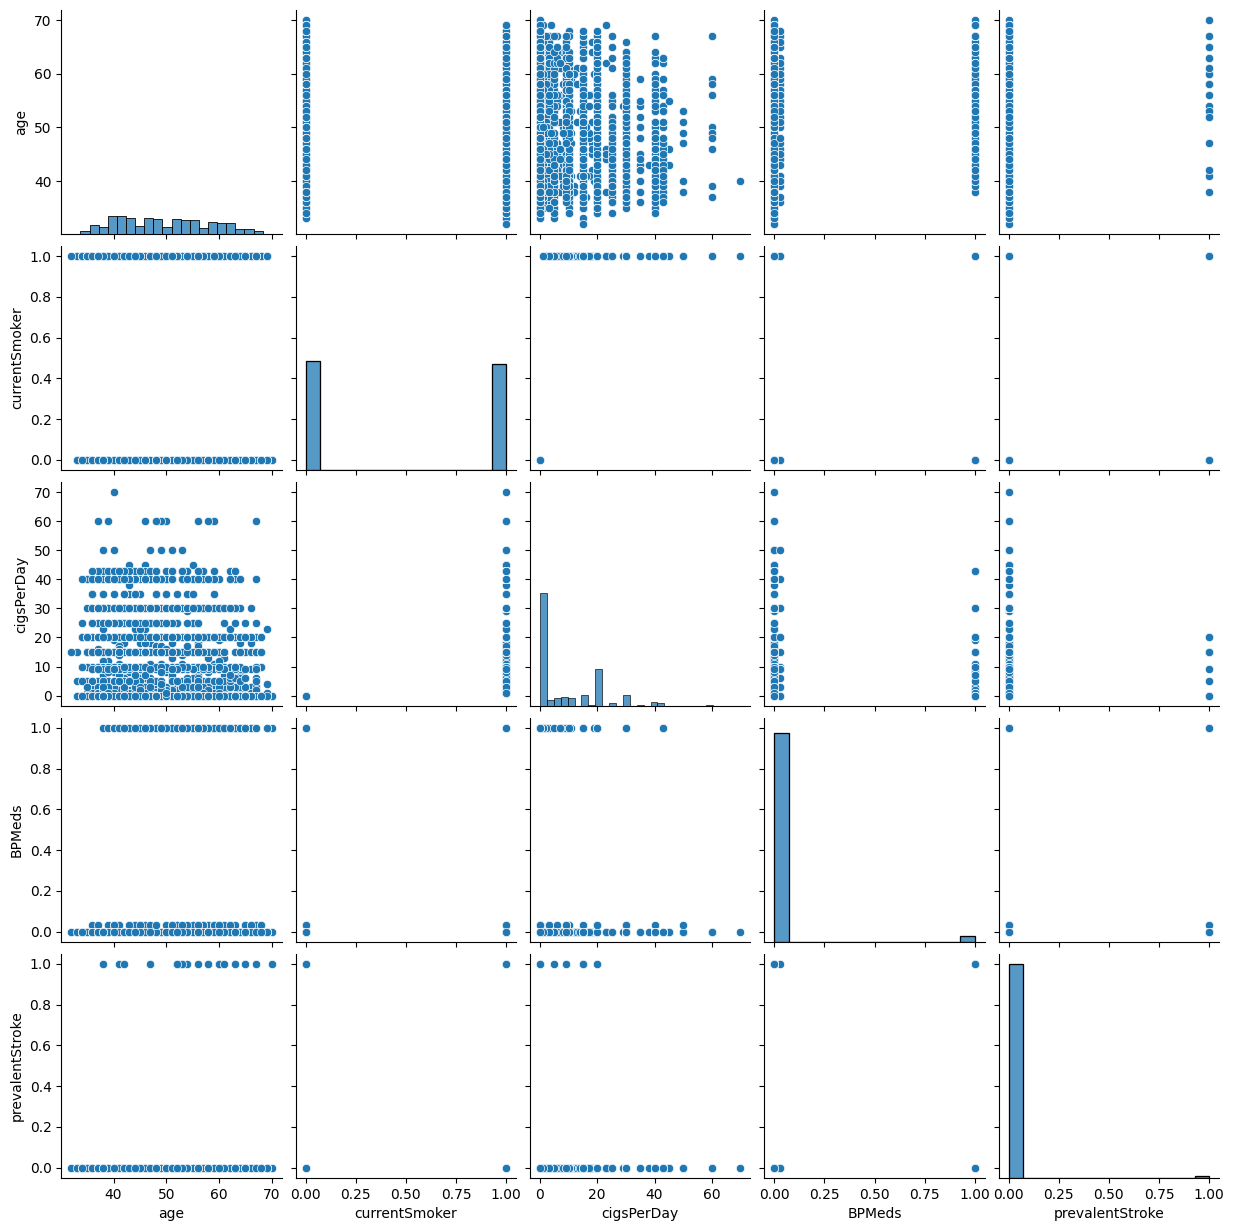

In [23]:
sns.pairplot(data[["age","currentSmoker","cigsPerDay","BPMeds","prevalentStroke","diabetes"]])

In [31]:
features=['age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']
# data.columns

In [32]:
# you can observer few columns have much higher values than other so we need to normalize the data
from sklearn.preprocessing import StandardScaler


scaler=StandardScaler()

data[features]=scaler.fit_transform(data[features])

In [33]:
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,-1.234951,-0.988271,-0.757973,-0.175871,-0.077033,-0.671101,-0.162477,-0.941345,-1.195907,-1.082625,0.286945,0.342744,-0.217530,0
1,0,-0.418257,-0.988271,-0.757973,-0.175871,-0.077033,-0.671101,-0.162477,0.299595,-0.515187,-0.158988,0.719327,1.590274,-0.261324,0
2,1,-0.184916,1.011868,0.925837,-0.175871,-0.077033,-0.671101,-0.162477,0.186783,-0.220209,-0.242955,-0.113500,-0.073099,-0.524091,0
3,0,1.331800,1.011868,1.767742,-0.175871,-0.077033,1.490089,-0.162477,-0.264468,0.800871,1.016549,0.682476,-0.904786,0.921128,1
4,0,-0.418257,1.011868,1.178408,-0.175871,-0.077033,-0.671101,-0.162477,1.089285,-0.106755,0.092912,-0.663805,0.758588,0.132827,0


split and train the data

In [34]:
X=data[features]
y=data["TenYearCHD"]

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [42]:
predict_y=model.predict(x_test)

Accuracy and model analysis

In [44]:
print("Accuracy:", accuracy_score(y_test, predict_y))
print("Classification Report:\n", classification_report(y_test, predict_y))

Accuracy: 0.8573113207547169
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.64      0.06      0.10       124

    accuracy                           0.86       848
   macro avg       0.75      0.53      0.51       848
weighted avg       0.83      0.86      0.80       848



In [45]:
# the accuracy is yet not good we can visualize the output model and the values those we are getting and do hyperparameter tuning to achieve better model